### Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


With logistic regression we will need the $\sigma ()$ function that is defined as

$$ \sigma(t) = \frac {1}{1+ \exp (-t)}. $$ 


The graph for the function is drawn below.

In [2]:
t=np.arange(-10, 10, 0.01)  # It is customary to use t instead of x in context of sigma function.
y = 1/(1 + np.exp(-t))


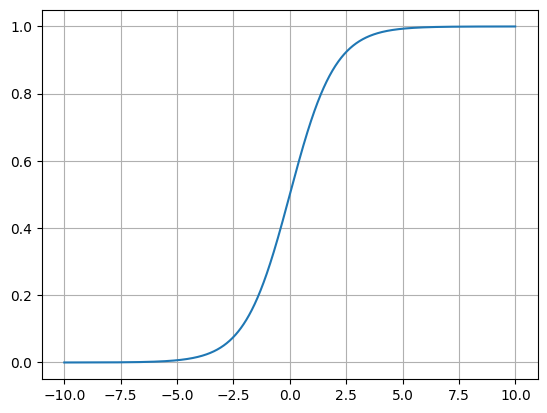

In [3]:
plt.plot(t,y)
plt.grid()

In the equation 4-13 in Géron book the $\boldsymbol \theta $ variable contains the parameters of the logistic regression model. The notation may not be familiar to you but here it is opened for you. You may see now that it is pretty much the same as you have used to with linear regression but now it involves that function $\sigma ()$.

$$ \hat p = \ h_{\bf \theta}(\bf x) = \sigma (\boldsymbol \theta^T\bf x) $$
$$ = \sigma (\theta_n x_n + \theta_{n-1} x_{n-2} + \dots + \theta_1 x_1 + \theta_0 x_0) $$


---

In [4]:
# Let's check the case with two target classes first

from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

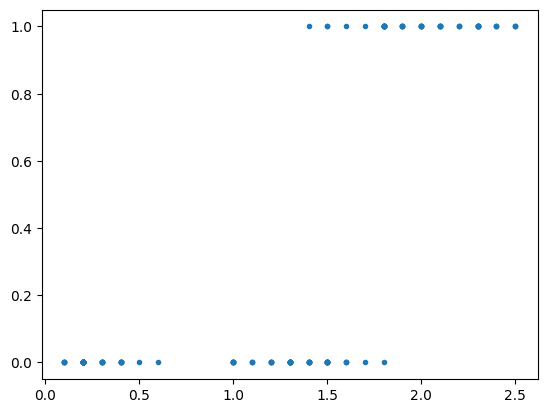

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
#log_reg = LogisticRegression()
log_reg.fit(X, y)

y_proba = log_reg.predict_proba(X)
plt.plot(X,y, '.')


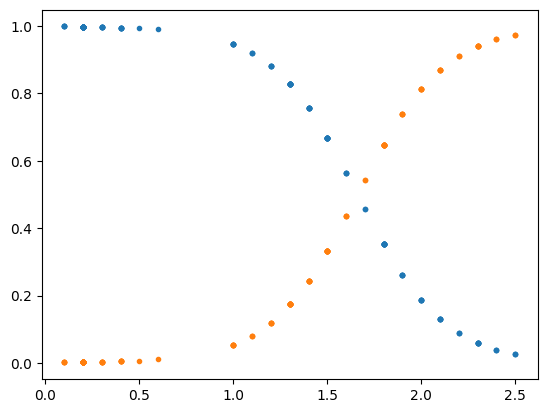

In [6]:
plt.plot(X,y_proba, '.')

In [7]:
y_proba

array([[0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99577067, 0.00422933],
       [0.99725379, 0.00274621],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99884373, 0.00115627],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99884373, 0.00115627],
       [0.99884373, 0.00115627],
       [0.99821774, 0.00178226],
       [0.99577067, 0.00422933],
       [0.99577067, 0.00422933],
       [0.99725379, 0.00274621],
       [0.99725379, 0.00274621],
       [0.99725379, 0.00274621],
       [0.99821774, 0.00178226],
       [0.99577067, 0.00422933],
       [0.99821774, 0.00178226],
       [0.99349182, 0.00650818],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99577067, 0.00422933],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.99821774, 0.00178226],
       [0.

In [8]:
# Notice, there are two lines now as y_proba contains probabilities for both, the positive and negative classes
y_proba.shape

(150, 2)

In [9]:
#note, here we have not used any train_test_split of validation set, this is just for illustration
y_pred = log_reg.predict(X)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



[-7.1947083]
[[4.3330846]]


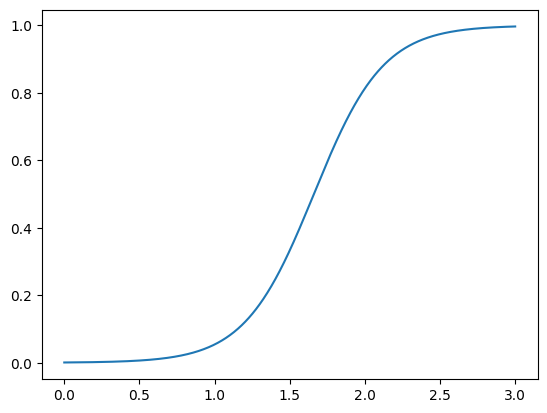

In [10]:
print(log_reg.intercept_)
print(log_reg.coef_)

# First let's form equation for "regression line" using the coef_ and intercept_
x2 = np.linspace(0, 3, 1000).reshape(-1, 1)
y2 = log_reg.coef_ * x2 + log_reg.intercept_

# Then, let's apply the $\sigma ()$ function and see the graph. It should be the same as in 
# the previous figure the increasing one
plt.plot(x2,1/(1+np.exp(-y2)))

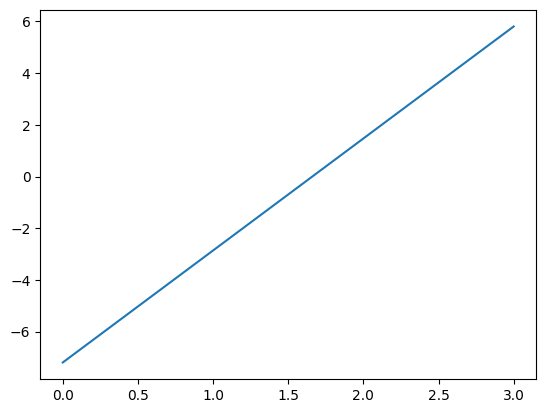

In [11]:
# The line defined by coef_ and intercept_ is drawn below. 
plt.plot(x2, y2)

---

# Using logistic regression for multiclass classification

In [12]:
y=iris["target"]
X = iris["data"]

X = StandardScaler().fit(X).transform(X)

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
#log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression(random_state=42)

In [13]:
y_pred = log_reg.predict(X)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



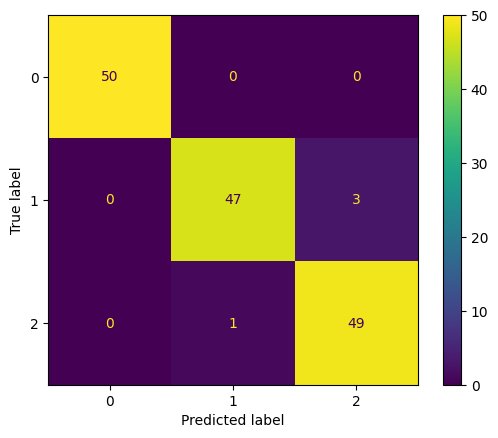

In [14]:
cm = confusion_matrix(y,y_pred)
dist = ConfusionMatrixDisplay(confusion_matrix = cm)
dist.plot()
plt.show()

In [15]:
# Ok, not you may want to start studying what are the options for regularizing the logistic regression model